In [1]:
# Exploring the Galaxy Halo connection of a MW-M31 merger remanent.
# Checking the stellar mass to halo mass relation of the MW-M31 merger remanent.
# The code will calculate the SHMR using the Moster et al. (2013) relation.

In [2]:
# import the needed stuff
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from matplotlib.colors import LogNorm
import scipy.optimize as so
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter
import os
from matplotlib.lines import Line2D
import matplotlib.animation as animation
import glob



In [3]:
# Made in homework 6.
MW = np.genfromtxt("Orbit_MW.txt", comments='#', names=True)
M31 = np.genfromtxt("Orbit_M31.txt", comments='#', names=True)
M33 = np.genfromtxt("Orbit_M33.txt", comments='#', names=True)

## Plotting the density plot of the halo and disk particles at the above snapshot time


In [7]:
# Code for plotting contours
# from https://gist.github.com/adrn/3993992


def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    #one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.80))
    #three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    #four_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.97))
    #five_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.98))


    #print(four_sigma)

    # Array of Contour levels. Adjust according to the above
    levels = [two_sigma]#, three_sigma, four_sigma, five_sigma][::-1] #[one_sigma,
    
    # contour level labels  Adjust accoding to the above.
    strs =['0.80'][::-1] #['0.68','0.80', ,'0.95', '0.97','0.98'

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

In [ ]:
#Only run it once! This code makes the merged file, with the M31 entry first, and the MW entry second.
# Paths for the files
M31_files = sorted(glob.glob("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_*.txt"))
MW_files = sorted(glob.glob("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_*.txt"))
output_path = "/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/"
# Ensure both lists are of the same length
"""if len(M31_files) != len(MW_files):
    print("Error: M31 and MW file counts do not match.")
else:
    for m31_file, mw_file in zip(M31_files, MW_files):
        output_filename = os.path.basename(m31_file).replace("M31", "Merged")
        output_file = os.path.join(output_path, output_filename)  # Creating an output filename
    
        with open(m31_file, 'r') as m31, open(mw_file, 'r') as mw, open(output_file, 'w') as out:
            out.writelines(m31.readlines())  # Write full M31 file
            mw_lines = mw.readlines()[4:]   # Skip first three lines of MW file
            out.writelines(mw_lines)        # Append remaining MW lines

        print(f"Merged {m31_file} and {mw_file} -> {output_file}")"""


Merged /Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_000.txt and /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_000.txt -> /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_000.txt
Merged /Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_001.txt and /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_001.txt -> /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_001.txt
Merged /Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_002.txt and /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_002.txt -> /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_002.txt
Merged /Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_003.txt and /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_003.txt -> /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_003.txt
Merged /Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_004.txt and /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_004.txt -> /Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_004.txt
Merge

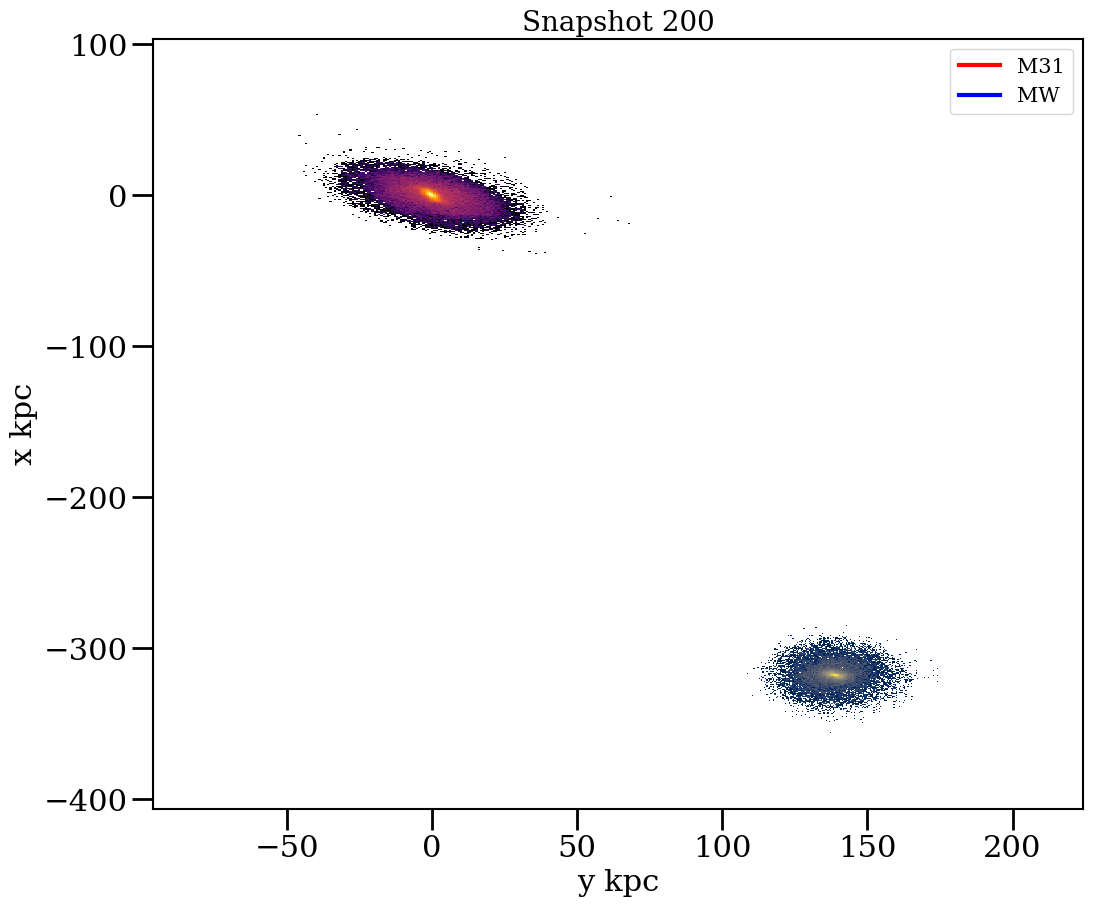

In [108]:

snapshot_number = np.arange(200, 800, 10)

fig, ax = plt.subplots(figsize=(12, 10))
cbar = None

# Function to update the plot for each snapshot
def update(frame):
    global cbar
    ax.clear()
    snap = snapshot_number[frame]
    # Load data for M31 and MW
    COMD_Merge = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 2)
    COMP_Merge = COMD_Merge.COM_P(0.1, 2)
    #xD_Merger = COMD_Merge.x - COMP_Merge[0].value
    #yD_Merger = COMD_Merge.y - COMP_Merge[1].value
    
    # Load data for M31 and MW
    COMD_M31 = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_{snap}.txt", 2)
    COMP_M31 = COMD_M31.COM_P(0.1, 2)
    xD_M31 = COMD_M31.x - COMP_Merge[0].value
    yD_M31 = COMD_M31.y - COMP_Merge[1].value
    
    COMD_MW = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_{snap}.txt", 2)
    COMP_MW = COMD_MW.COM_P(0.1, 2)
    xD_MW = COMD_MW.x - COMP_Merge[0].value
    yD_MW = COMD_MW.y - COMP_Merge[1].value

    # Plot 2D histograms
    hist1 = ax.hist2d(xD_M31, yD_M31, bins=150, norm=LogNorm(), cmap='inferno', label ='M31')
    hist2 = ax.hist2d(xD_MW, yD_MW, bins=150, norm=LogNorm(), cmap='cividis', label ='MW')
    #hist2 = ax.hist2d(xD_Merger, yD_Merger, bins=150, norm=LogNorm(), cmap='cividis')
    # Update colorbar
    """if cbar:
        cbar.remove()
    cbar = fig.colorbar(hist1[3], ax=ax)
    cbar.set_label("Number of disk particles per bin", fontsize=15)"""
    legend_elements = [Line2D([0], [0], color='red', lw=3, label='M31'),
                       Line2D([0], [0], color='blue', lw=3, label='MW')]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=15)
    
    ax.set_xlabel("y kpc", fontsize=22)
    ax.set_ylabel("x kpc", fontsize=22)
    # Calculate the min and max for the x and y axes to auto-zoom
    all_x = np.concatenate([xD_M31, xD_MW])
    all_y = np.concatenate([yD_M31, yD_MW])
    
    # Determine the zoom level (min and max limits) for both x and y axes
    margin = 50  # Add a small margin around the data
    ax.set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
    ax.set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
    ax.set_title(f"Snapshot {snap}", fontsize=20)
    #ax.legend(loc='upper right', fontsize=15)
    # Adjust tick label size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size

ani = animation.FuncAnimation(fig, update, frames=len(snapshot_number), repeat=True)
# Save animation as MP4

# Specify the ffmpeg writer
ani.save("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/ASTR400B/ResearchAssignment/Final_code/m31_animation.mp4")

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())

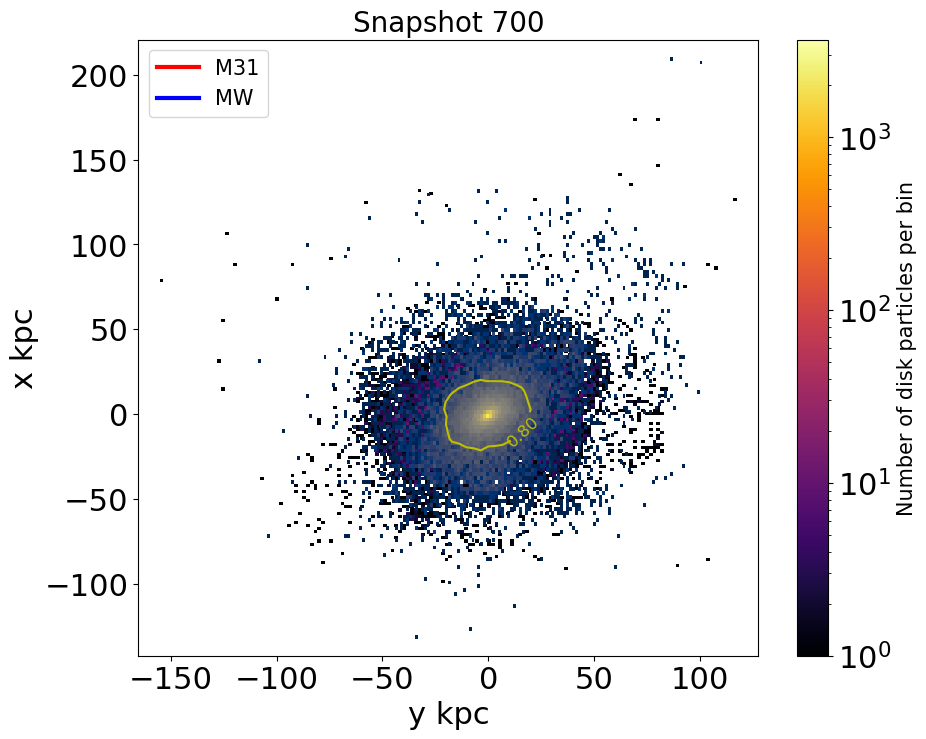

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8
                                      
                                      ))

snap = 700
# Load data for M31 and MW
COMD_Merge = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 2)
COMP_Merge_p = COMD_Merge.COM_P(0.1, 2)
xD_Merger = COMD_Merge.x - COMP_Merge_p[0].value
yD_Merger = COMD_Merge.y - COMP_Merge_p[1].value
zD_Merger = COMD_Merge.z - COMP_Merge_p[2].value

# Load data for M31 and MW
COMD_M31 = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_{snap}.txt", 2)
COMP_M31 = COMD_M31.COM_P(0.1, 2)
xD_M31 = COMD_M31.x - COMP_Merge_p[0].value
yD_M31 = COMD_M31.y - COMP_Merge_p[1].value
zD_M31 = COMD_M31.z - COMP_Merge_p[2].value 

COMD_MW = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_{snap}.txt", 2)
COMP_MW = COMD_MW.COM_P(0.1, 2)
xD_MW = COMD_MW.x - COMP_Merge_p[0].value
yD_MW = COMD_MW.y - COMP_Merge_p[1].value
zD_MW = COMD_MW.z - COMP_Merge_p[2].value

# Plot 2D histograms
hist1 = ax.hist2d(xD_M31, yD_M31, bins=150, norm=LogNorm(), cmap='inferno', label ='M31')
hist2 = ax.hist2d(xD_MW, yD_MW, bins=150, norm=LogNorm(), cmap='cividis', label ='MW')
#hist3 = ax[1].hist2d(xD_Merger, yD_Merger, bins=150, norm=LogNorm(), cmap='cividis')
# Update colorbar
#contour1 = density_contour(xD_MW, yD_MW, 80, 80, ax=ax[0], colors=['g', "r"])
contour2 = density_contour(xD_Merger, yD_Merger, 80, 80, ax=ax, colors=['y', "w"])

cbar = fig.colorbar(hist1[3], ax=ax)
cbar.set_label("Number of disk particles per bin", fontsize=15)
legend_elements = [Line2D([0], [0], color='red', lw=3, label='M31'),
                    Line2D([0], [0], color='blue', lw=3, label='MW')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=15)

ax.set_xlabel("y kpc", fontsize=22)
ax.set_ylabel("x kpc", fontsize=22)
# Calculate the min and max for the x and y axes to auto-zoom
all_x = np.concatenate([xD_M31, xD_MW])
all_y = np.concatenate([yD_M31, yD_MW])

# Determine the zoom level (min and max limits) for both x and y axes
margin = 10  # Add a small margin around the data
ax.set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
ax.set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
#ax[1].set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
#ax[1].set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
#ax.set_xlim(-20, 20)
#ax.set_ylim(-15, 15)
ax.set_title(f"Snapshot {snap}", fontsize=20)
#ax.legend(loc='upper right', fontsize=15)
# Adjust tick label size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.savefig("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/ASTR400B/ResearchAssignment/Final_code/700_merge")
plt.show()

In [ ]:
def find_dist_in_contour(xdata, ydata, zdata, nbins_x, nbins_y, sigma_level):
    """
    Find the data points that fall within a specific confidence contour level.
    
    Parameters
    ----------
    xdata : numpy.ndarray
        x-coordinates of data pointsg
    ydata : numpy.ndarray
        y-coordinates of data points
    zdata : numpy.ndarray
        z-values associated with (x, y) points
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    sigma_level : str, optional
        The confidence level to use ("one_sigma", "two_sigma", etc.)
        
    Returns
    -------
    numpy.ndarray
        Array of (x, y, z) data points within the specified contour
    """
    # Create the 2D histogram
    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x, nbins_y), density=True)
    
    # Calculate the bin sizes
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1, nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y, 1))
    
    # Calculate the PDF
    pdf = (H * (x_bin_sizes * y_bin_sizes))
    
    # Get the bin centers
    X, Y = 0.5 * (xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1])
    Z = pdf.T  # Transpose to align with (X, Y)
    # Calculate contour threshold
    threshold = so.brentq(find_confidence_interval, 0., 1., args=(pdf, sigma_level/100))
    # Find all points where PDF is above the threshold (inside the contour)
    in_contour = Z >= threshold
    # Extract the indices of the bins inside the contour
    contour_indices = np.argwhere(in_contour)
    print(contour_indices)
    # Convert bin indices to actual (x, y) coordinates
    x_contour = X[contour_indices[:, 1]]  
    y_contour = Y[contour_indices[:, 0]] 
    print(len(x_contour))
    # Using the edge width as defined above
    x_range = (xedges[1] - xedges[0]) / 2
    y_range = (yedges[1] - yedges[0]) / 2
    in_contour_mask = np.zeros(len(xdata), dtype=bool)
    # finding what x and y lies within the countour point +/- the edge width
    for i, (x, y) in enumerate(zip(xdata, ydata)):
        in_contour_mask[i] = np.any(
            (x_contour - x_range <= x) & (x <= x_contour + x_range) &
            (y_contour - y_range <= y) & (y <= y_contour + y_range)
        )

    x_points_in_contour = xdata[in_contour_mask]
    y_points_in_contour = ydata[in_contour_mask]
    max_dist = np.max(np.sqrt(x_points_in_contour**2 + y_points_in_contour**2))
    return max_dist


In [445]:
max_dist = find_dist_in_contour(xD_Merger, yD_Merger,zD_Merger, 80, 80, 80)
print(f"Maximum distance value within 2-sigma contour: {max_dist* u.kpc} ") 

[[26 42]
 [26 43]
 [26 44]
 [26 45]
 [26 46]
 [27 40]
 [27 41]
 [27 42]
 [27 43]
 [27 44]
 [27 45]
 [27 46]
 [27 47]
 [27 48]
 [28 40]
 [28 41]
 [28 42]
 [28 43]
 [28 44]
 [28 45]
 [28 46]
 [28 47]
 [28 48]
 [28 49]
 [29 40]
 [29 41]
 [29 42]
 [29 43]
 [29 44]
 [29 45]
 [29 46]
 [29 47]
 [29 48]
 [29 49]
 [29 50]
 [30 40]
 [30 41]
 [30 42]
 [30 43]
 [30 44]
 [30 45]
 [30 46]
 [30 47]
 [30 48]
 [30 49]
 [30 50]
 [31 39]
 [31 40]
 [31 41]
 [31 42]
 [31 43]
 [31 44]
 [31 45]
 [31 46]
 [31 47]
 [31 48]
 [31 49]
 [31 50]
 [32 40]
 [32 41]
 [32 42]
 [32 43]
 [32 44]
 [32 45]
 [32 46]
 [32 47]
 [32 48]
 [32 49]
 [32 50]
 [33 40]
 [33 41]
 [33 42]
 [33 43]
 [33 44]
 [33 45]
 [33 46]
 [33 47]
 [33 48]
 [33 49]
 [33 50]
 [34 42]
 [34 43]
 [34 44]
 [34 45]
 [34 46]
 [34 47]
 [34 48]
 [34 49]
 [35 44]]
89
1.7067260000000033 81
[ True  True  True ... False  True False]
Maximum distance value within 2-sigma contour: 24.788449020461115 kpc 


In [336]:
# Load data for M31 and MW
COMD_Merge_3 = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 3)
COMP_Merge_p3 = COMD_Merge_3.COM_P(0.1, 3)

In [337]:
COMP_Merge_p3, COMP_Merge_p

(<Quantity [146.81,  54.25, 110.37] kpc>,
 <Quantity [146.73,  54.79, 110.58] kpc>)

In [286]:
# read data in the given file using Read
_, _, data = Read("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_700.txt")                                                                                             

#create an array to store indexes of particles of desired Ptype                                
index = np.where((data['type'] == 2) | (data['type'] == 3))
m = data['m'][index]
# write your own code to complete this for positions and velocities
x_merg = data['x'][index] - COMP_Merge_p[0].value
y_merg = data["y"][index] - COMP_Merge_p[1].value
z_merg = data["z"][index] - COMP_Merge_p[2].value

In [289]:
dist_array = x_merg**2 + y_merg**2 + z_merg**2
dist_array = np.sqrt(dist_array)
print(dist_array)
idx_dist_3d = np.where(dist_array <= max_dist)[0]
# x,y ,z position withing the sphere and the position correspond to that in the merged files.
x_3d = x_merg[idx_dist_3d] + COMP_Merge_p[0].value
y_3d = y_merg[idx_dist_3d] + COMP_Merge_p[1].value
z_3d = z_merg[idx_dist_3d] + COMP_Merge_p[2].value
m_3d = m[idx_dist_3d]
x_3d , y_3d, z_3d

[10.56954401  1.52671146  5.15346188 ...  0.44706444 11.32293824
  1.13160704]


(array([145.992, 145.865, 143.311, ..., 146.793, 148.508, 147.088]),
 array([64.7408, 53.5483, 53.9756, ..., 54.8131, 55.2738, 55.8407]),
 array([107.094, 110.782, 114.349, ..., 110.138, 121.752, 110.8  ]))

In [290]:
len(idx_dist_3d), len(index[0])

(86419, 112000)

## getting the desired Halo particles

In [416]:
#Now we write code to get the halo points.
# wee need halo points that are within r200.

#plotting halo mass as a function of the radius from the center of the merged remnant.
COMD_Merge_halo = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 1)
COMP_Merge_halo_p = COMD_Merge_halo.COM_P(0.1, 1)

index_halo = np.where(data['type'] == 1)
m_halo = data['m'][index_halo]
x_halo = data['x'][index_halo] - COMP_Merge_halo_p[0].value
y_halo = data["y"][index_halo] - COMP_Merge_halo_p[1].value
z_halo = data["z"][index_halo] - COMP_Merge_halo_p[2].value
dist_array_halo = x_halo**2 + y_halo**2 + z_halo**2
dist_array_halo = np.sqrt(dist_array_halo)


In [410]:
# store the mass of each particle within the radii
radii = np.sort(dist_array_halo.copy())
particle_mass_enclosed_array = np.zeros(len(radii))
# identify particles that are enclodes within the radii
all_radii = np.sqrt((x_halo)**2+(y_halo)**2+(z_halo)**2)
# loop over the radii
for i in range(len(radii)):
    # get the mass of those particles
    particle_mass_enclosed_array[i] = np.sum(m_halo[np.where(all_radii < radii[i])]) * 1e10
particle_mass_enclosed_array
density_array = particle_mass_enclosed_array / (4/3 * np.pi * radii**3)

In [13]:
p_c = 8.5 * 10**-27 * u.kg/u.m**3
p_c = p_c.to(u.Msun / u.kpc**3)
p_c
# halo density limit
h_density_lim = 200*p_c
h_density_lim

<Quantity 25118.55469019 solMass / kpc3>

In [14]:
p_c

<Quantity 125.59277345 solMass / kpc3>

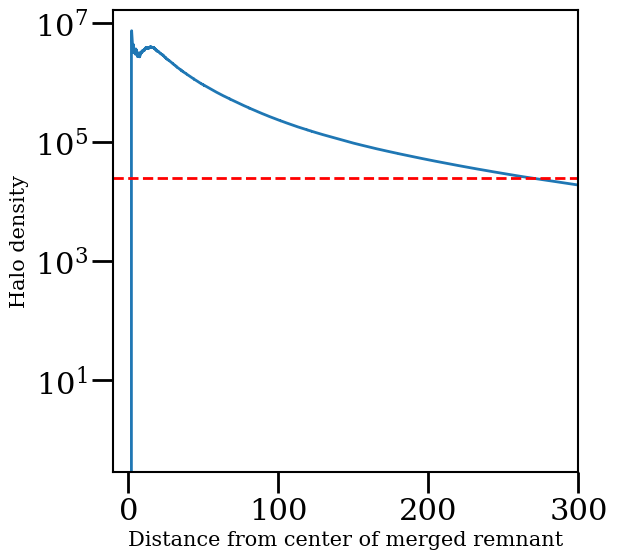

In [446]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(radii, density_array)
ax.axhline(h_density_lim.value, color='red', linestyle='--', label='Halo density limit')
ax.set_xlabel("Distance from center of merged remnant", fontsize=15)
ax.set_ylabel("Halo density", fontsize=15)
ax.set_xlim(-10, 300)
ax.set_yscale('log')
#ax.set_ylim(1e3, 1e5)

In [413]:
diff_array = abs(density_array - h_density_lim.value)
idx_halo = np.where(diff_array == np.min(diff_array))[0]
desired_halo_rad = radii[idx_halo]

In [ ]:
#get all the particles within this radius
idx_halo = np.where(dist_array_halo <= desired_halo_rad)[0]
# x,y ,z position withing the sphere and the position correspond to that in the merged files.
x_halo = x_halo[idx_halo] + COMP_Merge_halo_p[0].value  
y_halo = y_halo[idx_halo] + COMP_Merge_halo_p[1].value  
z_halo = z_halo[idx_halo] + COMP_Merge_halo_p[2].value
m_halo = m_halo[idx_halo]
idx_halo, x_halo , y_halo, z_halo, m_halo   

(array([    0,     1,     2, ..., 49990, 49997, 49998]),
 array([120.569 , 182.578 , 104.63  , ..., 195.359 , 269.908 ,  11.8288]),
 array([-159.543 ,  127.723 ,   17.0828, ...,   23.8413,   30.2379,
         167.901 ]),
 array([ 79.8894,  81.4756, 203.898 , ..., 131.91  ,  67.6767, 244.725 ]),
 array([0.00768352, 0.00768352, 0.00768352, ..., 0.0078997 , 0.0078997 ,
        0.0078997 ]))

In [419]:
len(idx_halo), len(index_halo[0])

(25877, 50000)

In [400]:
total_stellar_mass = np.sum(m_3d) * 1e10
total_stellar_mass


172885404040.00006

In [405]:
total_halo_mass = np.sum(m_halo) * 1e10
total_halo_mass
#in scientific notation
total_halo_mass = "{:.2e}".format(total_halo_mass)
total_stellar_mass = "{:.2e}".format(total_stellar_mass)
print(f"Total stellar mass: {total_stellar_mass} Msun")
print(f"Total halo mass: {total_halo_mass} Msun")

Total stellar mass: 1.73e+11 Msun
Total halo mass: 2.02e+12 Msun


## establishing the moster relation

In [422]:
class AbundanceMatching:
    """ Class to define the abundance matching relations from 
    Moster et al. 2013, which relate the stellar mass of a galaxy
    to the expected dark matter halo mass, according to 
    Lambda Cold Dark Matter (LCDM) theory """
    
    
    def __init__(self, mhalo, z):
        """ Initialize the class
        
        PARAMETERS
        ----------
            mhalo: float
                Halo mass in Msun
            z: float
                redshift
        """
        
        #initializing the parameters:
        self.mhalo = float(mhalo) # Halo Mass in Msun
        self.z = float(z)  # Redshift
        
        
    def logM1(self):
        """eq. 11 of Moster 2013
        OUTPUT: 
            M1: float 
                characteristic mass in log(Msun)
        """
        M10      = 11.59
        M11      = 1.195 
        return M10 + M11*(self.z/(1+self.z))  
    
    
    def N(self):
        """eq. 12 of Moster 2013
        OUTPUT: 
            Normalization for eq. 2
        """
        N10      = 0.0351
        N11      = -0.0247
    
        return N10 + N11*(self.z/(1+self.z))
    
    
    def Beta(self):
        """eq. 13 of Moster 2013
        OUTPUT:  power of the low mass slope"""
        beta10      = 1.376
        beta11      = -0.826
    
        return beta10 + beta11*(self.z/(1+self.z))
    
    def Gamma(self):
        """eq. 14 of Moster 2013
        OUTPUT: power of the high mass slope """
        gamma10      = 0.608
        gamma11      = 0.329
    
        return gamma10 + gamma11*(self.z/(1+self.z))
    
    
    def SHMratio(self):
        """ 
        eq. 2 of Moster + 2013
        The ratio of the stellar mass to the halo mass
        
        OUTPUT: 
            SHMratio float
                Stellar mass to halo mass ratio
        """
        M1 = 10**self.logM1() # Converting characteristic mass 
        # to Msun from Log(Msun)
        
        A = (self.mhalo/M1)**(-self.Beta())  # Low mass end
        
        B = (self.mhalo/M1)**(self.Gamma())   # High mass end
        
        Norm = 2*self.N() # Normalization
    
        SHMratio = Norm*(A+B)**(-1)
    
        return SHMratio 
    
 # Q1: add a function to the class that takes the SHM ratio and returns 
# The stellar mass 
    def StellarMass(self):
        """Method to compute the stellar mass
        using eq 2 of Moster+2013 (stellar / halo mass ratio)
        
        Output;
            starMass: float, stellar mass in Msun"""
        
        starMass = self.mhalo*self.SHMratio()

        return starMass




In [424]:
MW_M31 = AbundanceMatching(total_halo_mass, 0)
expected_stellar_mass = MW_M31.StellarMass() 
expected_stellar_mass = "{:.2e}".format(expected_stellar_mass)
print(f"Expected stellar mass: {expected_stellar_mass} Msun")

Expected stellar mass: 5.02e+10 Msun
